In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import numpy as np

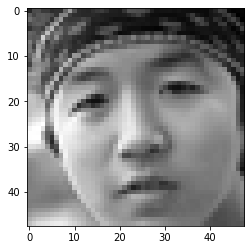

(35886, 48, 48, 1)


In [19]:
os.listdir()
#DataSet de 35886 datos
DataSet = pd.read_csv('fer2013.csv').values

#Emociones
y = DataSet[:,0]

    

#Arreglo de imagenes
pixels = DataSet[:, 1]
images = np.zeros((pixels.shape[0],48,48,1))
for i in range(0,images.shape[0]):
    p = pixels[i].split(' ')
    images[i,:,:,0] = np.array(list(map(lambda x: int(x),p))).reshape(1,48,48)/255
    
plt.imshow(images[10,:,:,0], cmap = 'gray'), plt.show()
print(images.shape)


In [20]:
def to_categorical(array,c):
    N = array.shape[0]
    y = np.zeros((N,c))
    for n in range(N):
        y[n,array[n]] = 1
    return y

In [21]:
#entrenamiento
train_images = images[0:28710,:,:,:]
train_labels = y[0:28710]
train_labels_HS = to_categorical(train_labels,7)
#testeo
test_images = images[28710:32300,:,:,:]
test_labels = y[28710:32300]
test_labels_HS = to_categorical(test_labels,7)

print(train_images.shape, train_labels_HS.shape)


(28710, 48, 48, 1) (28710, 7)


In [22]:
#Modelo sacado de internet
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(48,48,1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(tf.keras.layers.Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(7 , activation='softmax'))



print(model.summary())


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 96)       

In [23]:
#Entrenamiento 
batch_size = 128
epochs = 14

model.compile(loss='binary_crossentropy',
              optimizer='adam' ,
              metrics=['accuracy'])
model.fit(train_images, train_labels_HS, epochs, batch_size)

Train on 28710 samples
Epoch 1/128
 7420/28710 [======>.......................] - ETA: 3:56 - loss: 0.3985 - accuracy: 0.8569

KeyboardInterrupt: 